In [1]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA
import mlflow
import mlflow.sklearn
import numpy as np
import os
import time

In [2]:
pip install mlflow

In [3]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, roc_curve, auc, confusion_matrix
import numpy as np
import os

In [4]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import random
np.random.seed(12345)

def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [5]:
def normalize_database(data_filename):
    global conn
    conn = sqlite3.connect('normalized.db', False)
    cur = conn.cursor()

    df = pd.read_csv("/content/employee attrition.csv")

    with conn:
        create_table_sql1 = "CREATE TABLE if not exists BusinessTravel (BusinessTravel_id INTEGER PRIMARY KEY, BusinessTravel TEXT NOT NULL);"
        create_table(conn, create_table_sql1)

        create_table_sql2 = "CREATE TABLE if not exists Department (Department_id INTEGER PRIMARY KEY, Department TEXT NOT NULL);"
        create_table(conn, create_table_sql2)

        create_table_sql3 = "CREATE TABLE if not exists EducationField (EducationField_id INTEGER PRIMARY KEY, EducationField TEXT NOT NULL);"
        create_table(conn, create_table_sql3)

        create_table_sql4 = "CREATE TABLE if not exists Gender (Gender_id INTEGER PRIMARY KEY, Gender TEXT NOT NULL);"
        create_table(conn, create_table_sql4)

        create_table_sql5 = "CREATE TABLE if not exists JobRole (JobRole_id INTEGER PRIMARY KEY, JobRole TEXT NOT NULL);"
        create_table(conn, create_table_sql5)

        create_table_sql6 = "CREATE TABLE if not exists MaritalStatus (MaritalStatus_id INTEGER PRIMARY KEY, MaritalStatus TEXT NOT NULL);"
        create_table(conn, create_table_sql6)

    business_travel = set(df['BusinessTravel'])
    with conn:
        for idx, value in enumerate(business_travel):
            cur.execute("INSERT OR REPLACE INTO BusinessTravel (BusinessTravel_id, BusinessTravel) VALUES (?, ?)", (idx + 1, value))

    # Insert data into 'Department' table
    department = set(df['Department'])
    with conn:
        for idx, value in enumerate(department):
            cur.execute("INSERT OR REPLACE INTO Department (Department_id, Department) VALUES (?, ?)", (idx + 1, value))

    # Insert data into 'EducationField' table
    education_field = set(df['EducationField'])
    with conn:
        for idx, value in enumerate(education_field):
            cur.execute("INSERT OR REPLACE INTO EducationField (EducationField_id, EducationField) VALUES (?, ?)", (idx + 1, value))

    # Insert data into 'Gender' table
    gender = set(df['Gender'])
    with conn:
        for idx, value in enumerate(gender):
            cur.execute("INSERT OR REPLACE INTO Gender (Gender_id, Gender) VALUES (?, ?)", (idx + 1, value))

    # Insert data into 'JobRole' table
    job_role = set(df['JobRole'])
    with conn:
        for idx, value in enumerate(job_role):
            cur.execute("INSERT OR REPLACE INTO JobRole (JobRole_id, JobRole) VALUES (?, ?)", (idx + 1, value))

    # Insert data into 'MaritalStatus' table
    marital_status = set(df['MaritalStatus'])
    with conn:
        for idx, value in enumerate(marital_status):
            cur.execute("INSERT OR REPLACE INTO MaritalStatus (MaritalStatus_id, MaritalStatus) VALUES (?, ?)", (idx + 1, value))

    # Fetch data from 'BusinessTravel' table
    stmt = "SELECT * FROM BusinessTravel;"
    data = execute_sql_statement(stmt, conn)
    business_travel = {}
    for row in data:
        business_travel[row[1]] = row[0]

    # Fetch data from 'Department' table
    stmt = "SELECT * FROM Department;"
    data = execute_sql_statement(stmt, conn)
    department = {}
    for row in data:
        department[row[1]] = row[0]

    # Fetch data from 'EducationField' table
    stmt = "SELECT * FROM EducationField;"
    data = execute_sql_statement(stmt, conn)
    education_field = {}
    for row in data:
        education_field[row[1]] = row[0]

    # Fetch data from 'Gender' table
    stmt = "SELECT * FROM Gender;"
    data = execute_sql_statement(stmt, conn)
    gender = {}
    for row in data:
        gender[row[1]] = row[0]

    # Fetch data from 'JobRole' table
    stmt = "SELECT * FROM JobRole;"
    data = execute_sql_statement(stmt, conn)
    job_role = {}
    for row in data:
        job_role[row[1]] = row[0]

    # Fetch data from 'MaritalStatus' table
    stmt = "SELECT * FROM MaritalStatus;"
    data = execute_sql_statement(stmt, conn)
    marital_status = {}
    for row in data:
        marital_status[row[1]] = row[0]

    # Drop existing 'Employee_Data' table and create a new one
    with conn:
        drop_table = "DROP TABLE IF EXISTS Employee_Data;"
        execute_sql_statement(drop_table, conn)
        create_table_sql = """
            CREATE TABLE IF NOT EXISTS Employee_Data (
                employee_id INTEGER PRIMARY KEY AUTOINCREMENT,
                Age INTEGER NOT NULL,
                Attrition VARCHAR NOT NULL,
                BusinessTravel VARCHAR NOT NULL,
                DailyRate INTEGER NOT NULL,
                Department VARCHAR NOT NULL,
                DistanceFromHome INTEGER NOT NULL,
                Education INTEGER NOT NULL,
                EducationField VARCHAR NOT NULL,
                EmployeeCount INTEGER NOT NULL,
                EmployeeNumber INTEGER NOT NULL,
                EnvironmentSatisfaction INTEGER NOT NULL,
                Gender VARCHAR NOT NULL,
                HourlyRate INTEGER NOT NULL,
                JobInvolvement INTEGER NOT NULL,
                JobLevel INTEGER NOT NULL,
                JobRole VARCHAR NOT NULL,
                JobSatisfaction INTEGER NOT NULL,
                MaritalStatus VARCHAR NOT NULL,
                MonthlyIncome INTEGER NOT NULL,
                MonthlyRate INTEGER NOT NULL,
                NumCompaniesWorked INTEGER NOT NULL,
                Over18 VARCHAR NOT NULL,
                OverTime VARCHAR NOT NULL,
                PercentSalaryHike INTEGER NOT NULL,
                PerformanceRating INTEGER NOT NULL,
                RelationshipSatisfaction INTEGER NOT NULL,
                StandardHours INTEGER NOT NULL,
                StockOptionLevel INTEGER NOT NULL,
                TotalWorkingYears INTEGER NOT NULL,
                TrainingTimesLastYear INTEGER NOT NULL,
                WorkLifeBalance INTEGER NOT NULL,
                YearsAtCompany INTEGER NOT NULL,
                YearsInCurrentRole INTEGER NOT NULL,
                YearsSinceLastPromotion INTEGER NOT NULL,
                YearsWithCurrManager INTEGER NOT NULL
            );
        """
        execute_sql_statement(create_table_sql, conn)

    # Read data from the employee dataset and insert into 'Employee_Data' table
    with open("employee attrition.csv") as file:
        next(file)  # Skip the header
        data = file.readlines()

    final = []

    for line in data:
        fields = line.strip().split(",")
        employee_data = tuple(fields)
        final.append(employee_data)

    # Insert data into 'Employee_Data' table
    with conn:
        for row in final:
            conn.execute("""
                INSERT INTO Employee_Data (
                    Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome,
                    Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction,
                    Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction,
                    MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18,
                    OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction,
                    StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear,
                    WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,
                    YearsWithCurrManager
                ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            """, row)

    global df1
    global df3
    stmt = "SELECT * FROM Employee_Data;"
    df1 = pd.read_sql_query(stmt, conn)

    # Create a copy of df1 for df3
    df3 = df1.copy()

    display(df1)

    sex_mapping = {'Male': 1, 'Female': 0}
    df1['Gender'] = df1['Gender'].map(sex_mapping)




In [6]:
normalize_database("employee attrition.csv")

,employee_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df3.describe()

,employee_id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
conn = sqlite3.connect('normalized.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the rows
tables = cursor.fetchall()

# Print the list of table names
for table in tables:
    print(table[0])

# Close the connection
conn.close()


BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
sqlite_sequence
Employee_Data


In [9]:
import pandas as pd
import sqlite3  # Assuming you are using SQLite, replace with appropriate library for your database

# Establish a connection to your database
conn = sqlite3.connect('normalized.db')
# Execute the SQL query and fetch the result into a Pandas DataFrame
sql="""
   SELECT
    e.*,
    bt.BusinessTravel AS BusinessTravel,
    d.Department AS Department,
    ef.EducationField AS EducationField,
    g.Gender AS Gender,
    jr.JobRole AS JobRole,
    ms.MaritalStatus AS MaritalStatus
FROM
    Employee_Data AS e
JOIN
    BusinessTravel AS bt ON e.BusinessTravel = bt.BusinessTravel_id
JOIN
    Department AS d ON e.Department = d.Department_id
JOIN
    EducationField AS ef ON e.EducationField = ef.EducationField_id
JOIN
    Gender AS g ON e.Gender = g.Gender_id
JOIN
    JobRole AS jr ON e.JobRole = jr.JobRole_id
JOIN
    MaritalStatus AS ms ON e.MaritalStatus = ms.MaritalStatus_id;

"""

# Execute the SQL query and fetch the result into a Pandas DataFrame
df3 = pd.read_sql_query(sql, conn)

# Close the database connection
conn.close()


In [10]:
import csv
# Step 1: Read CSV File
data = []
with open('/content/employee attrition.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        data.append(row)

# Step 2: Convert to DataFrame
df3 = pd.DataFrame(data[1:], columns=data[0])

In [11]:
df3

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [12]:
df3['Attrition'] = df3['Attrition'].map({'Yes':1, 'No': 0})

In [13]:
y = df3.Attrition
X = df3.drop('Attrition', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#EDA

##Univariant Analysis

In [15]:
plt.style.use('seaborn')

<ipython-input-15-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


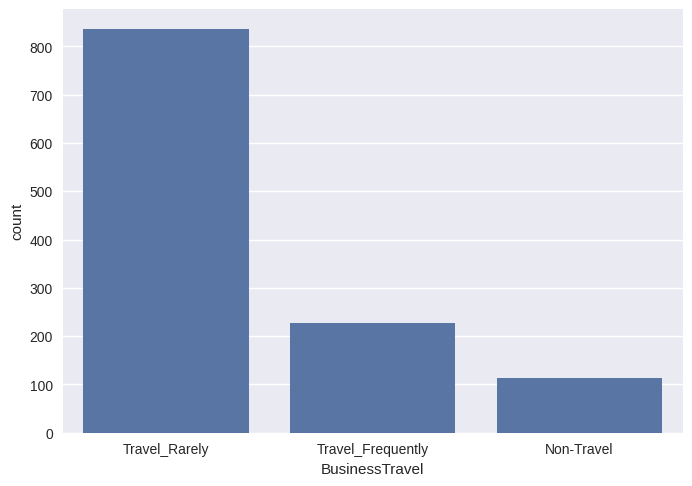

In [16]:
sns.barplot(x = X_train.BusinessTravel.value_counts().index, y = X_train.BusinessTravel.value_counts());

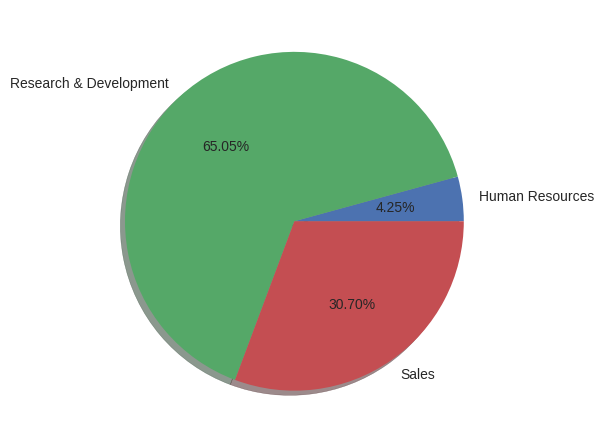

In [17]:
c = X_train.groupby('Department')['Department'].count()

plt.pie(c,labels=c.index,shadow=True,autopct="%.2f%%")
plt.show()

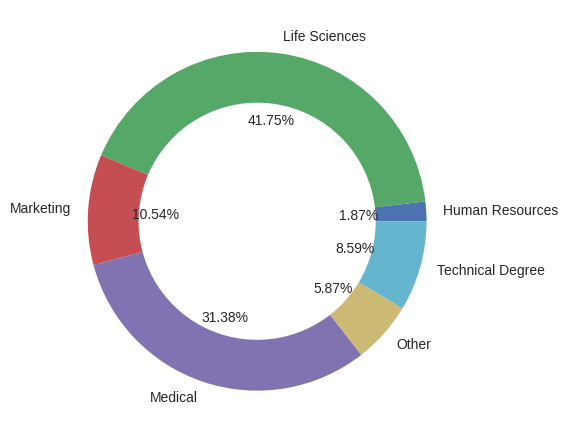

In [18]:
c_i = X_train.groupby('EducationField')['EducationField'].count()

plt.pie(c_i, labels=c_i.index, autopct="%.2f%%", wedgeprops=dict(width=0.3));
plt.show()

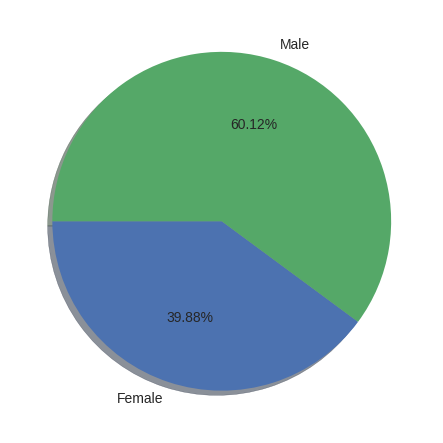

In [19]:
c = X_train.groupby('Gender')['Gender'].count()

plt.pie(c,labels=c.index,shadow=True,autopct="%.2f%%",startangle=180)
plt.show()

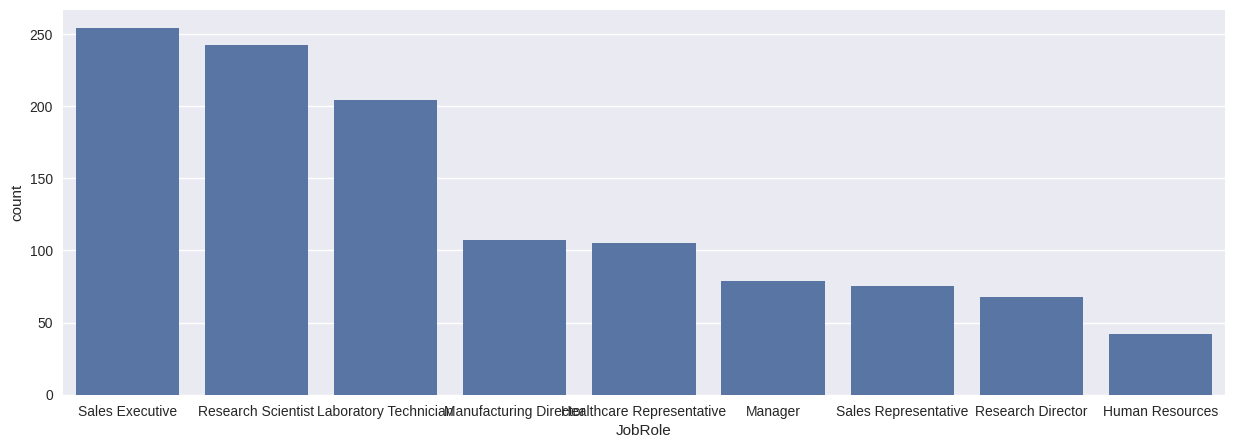

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(x = X_train.JobRole.value_counts().index,y = X_train.JobRole.value_counts());

##Numerical Variables

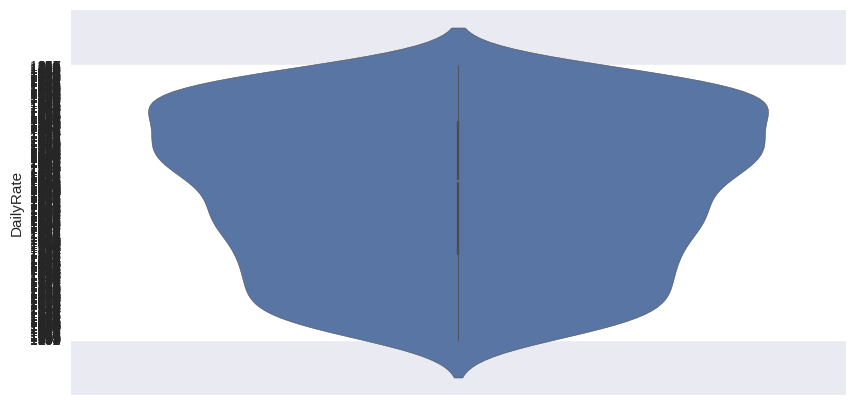

In [21]:
plt.figure(figsize=(10, 5))
sns.violinplot(X_train.DailyRate);

<ipython-input-22-293216ab07a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.Age);


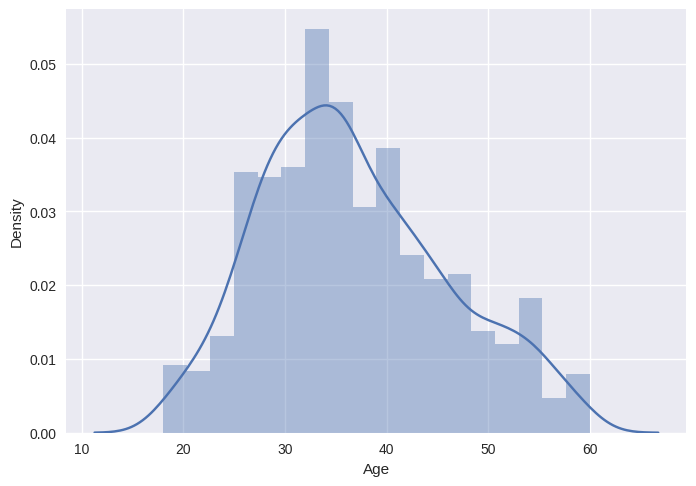

In [22]:
sns.distplot(X_train.Age);

<ipython-input-23-0b2fb465053a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.DistanceFromHome);


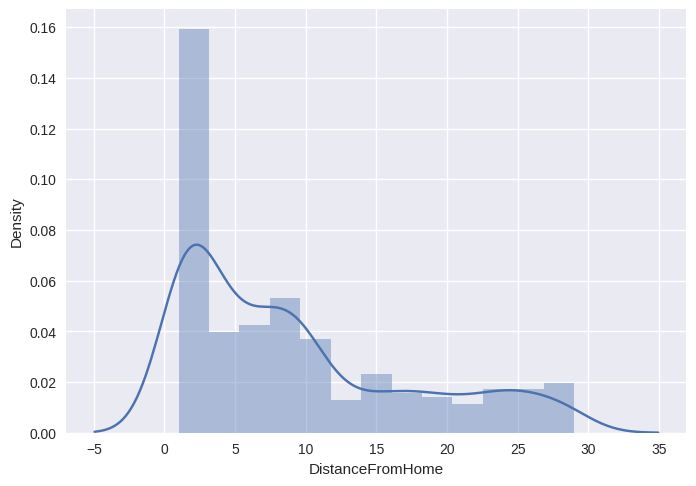

In [23]:
sns.distplot(X_train.DistanceFromHome);

<ipython-input-24-2ada5b0fc37b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['MonthlyIncome'], bins=30, kde=True)


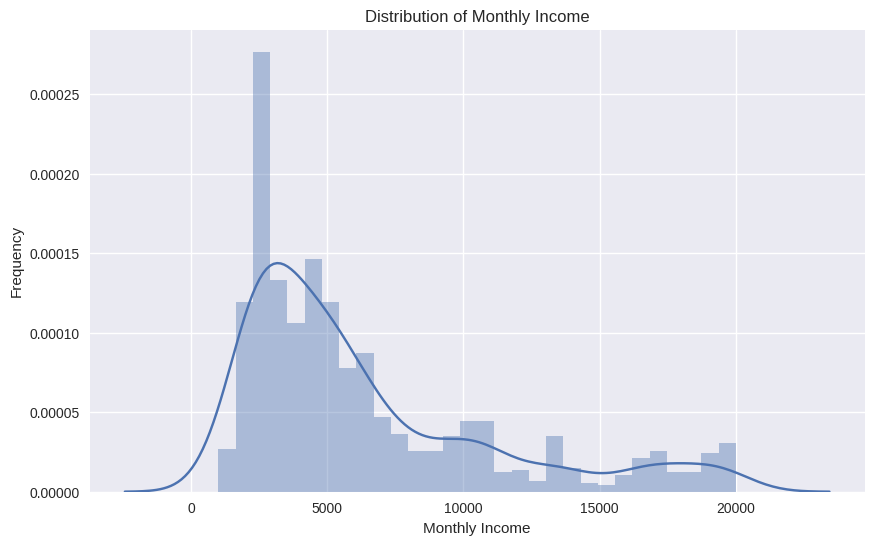

In [24]:
plt.figure(figsize=(10, 6))
sns.distplot(X_train['MonthlyIncome'], bins=30, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

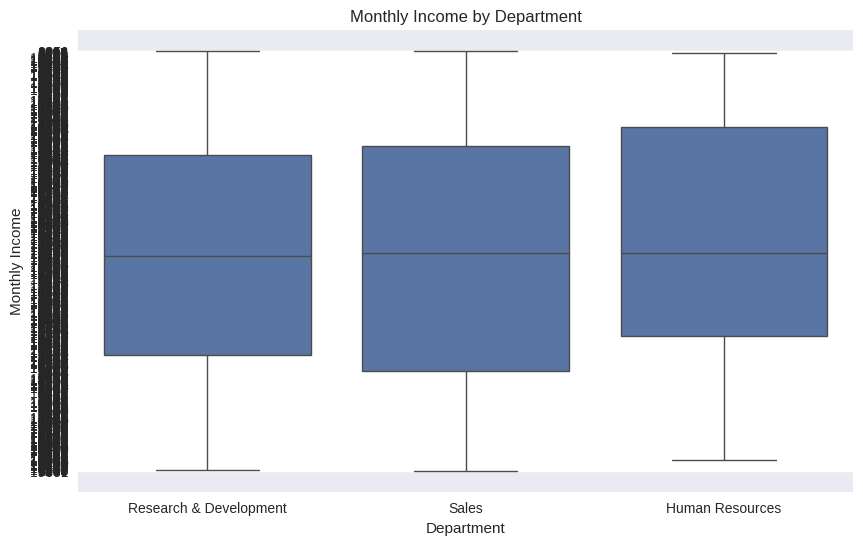

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='MonthlyIncome', data=X_train)
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.show()

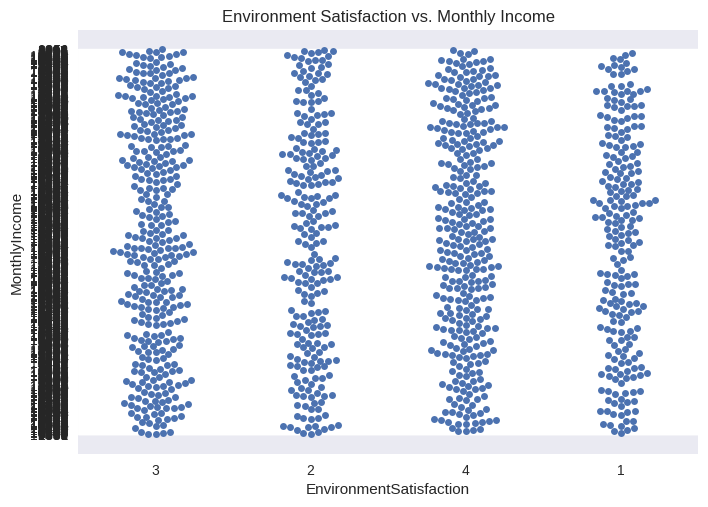

In [26]:
sns.swarmplot(x='EnvironmentSatisfaction', y='MonthlyIncome', data=X_train)
plt.title('Environment Satisfaction vs. Monthly Income')
plt.show()


<Figure size 1500x800 with 0 Axes>

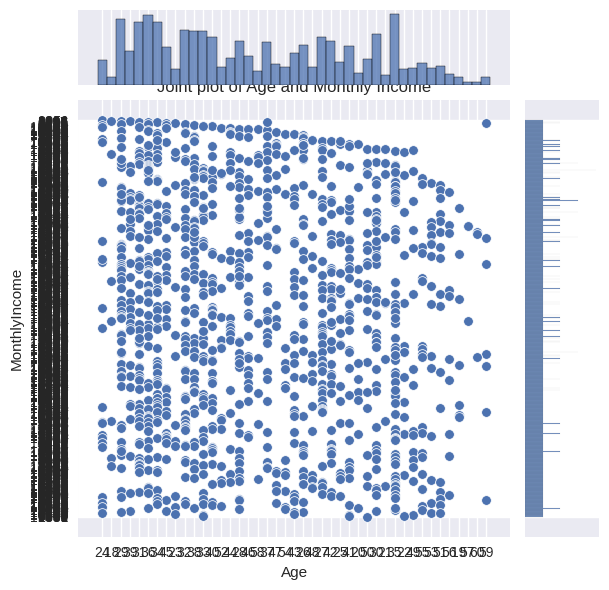

In [27]:
plt.figure(figsize=(15, 8))
sns.jointplot(x='Age', y='MonthlyIncome', data=X_train, kind='scatter')
plt.title('Joint plot of Age and Monthly Income')
plt.show()

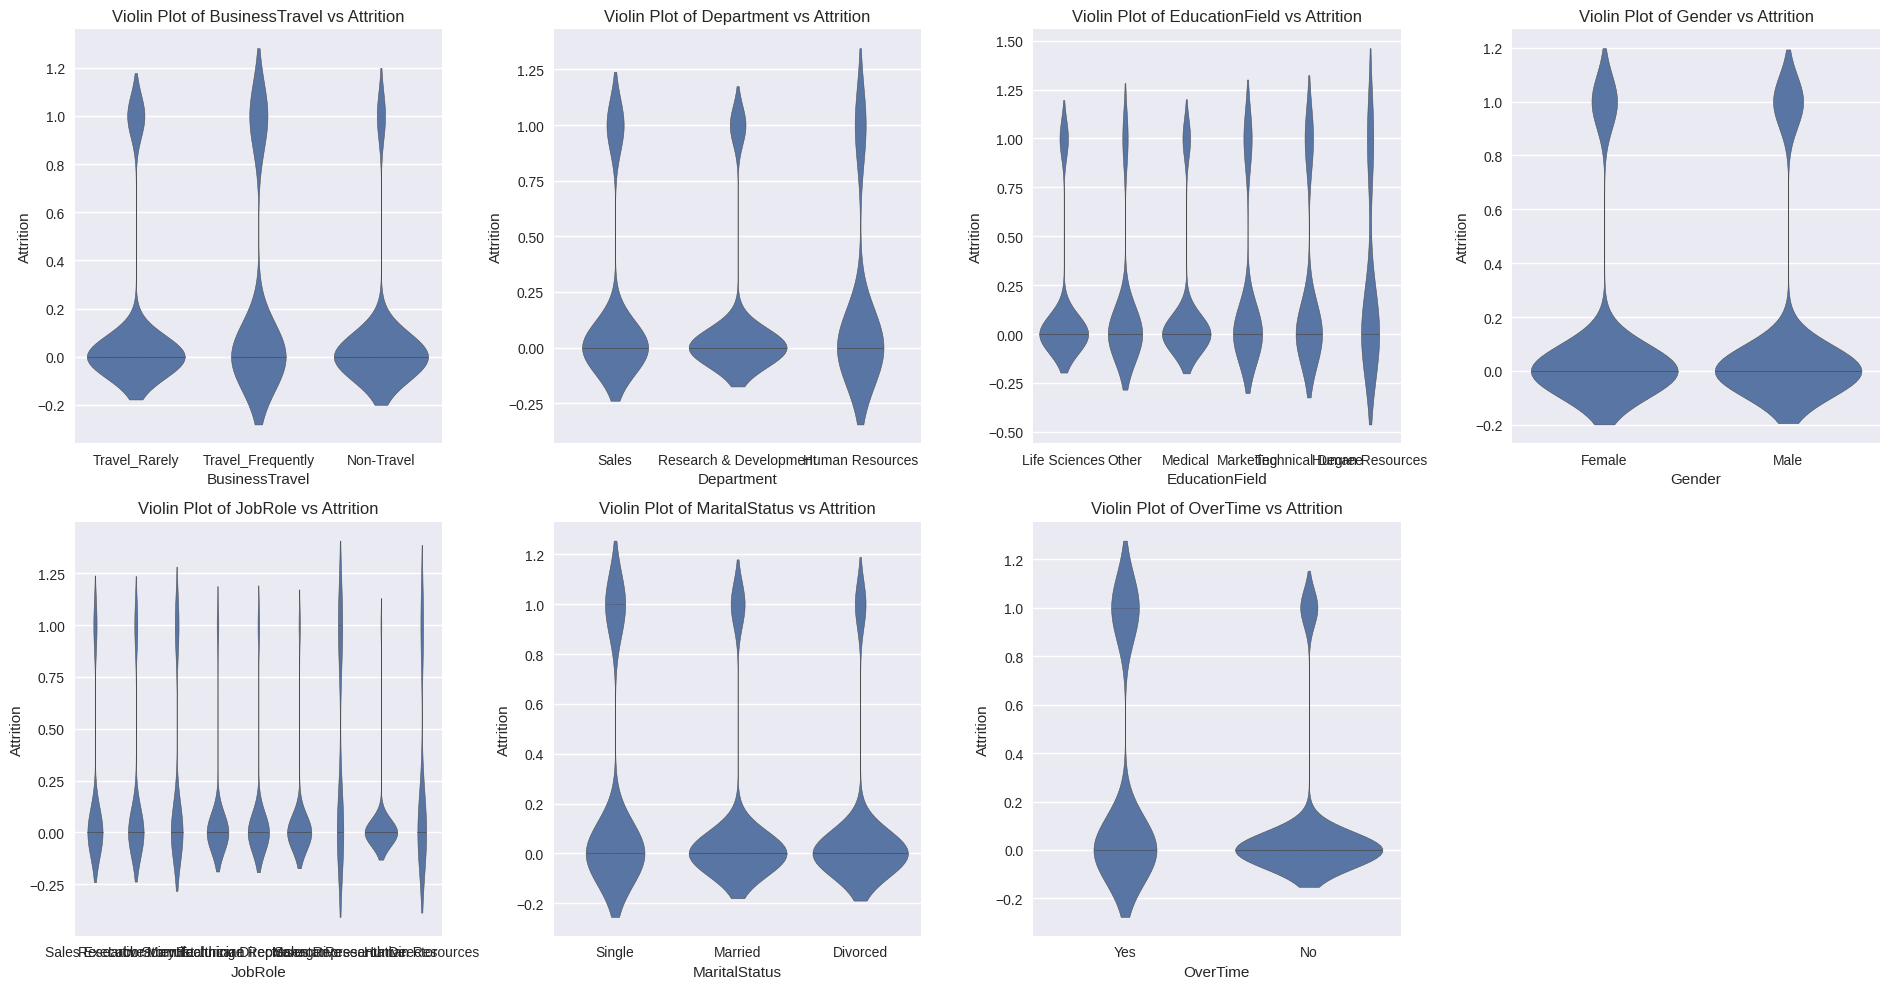

In [28]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Set up the figure and axes
plt.figure(figsize=(19, 10))

# Loop through each categorical feature and create a violin plot
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(2, 4, i)
    sns.violinplot(x=feature, y='Attrition', data=df3, inner='quartile')
    plt.title(f'Violin Plot of {feature} vs Attrition')

# Adjust layout
plt.tight_layout()
plt.show()

Categorical variables - BusinessTravel, Department, Education, EducationField, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, Martial Status, Over18, OverTime, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance,


Numerical variables - 'employee_id', 'Age', DailyRate, DistanceFromHome, EmployeeCount, EmployeeNumber, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, StandardHours, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [29]:
X_train.head().T

,1097,727,254,1175,1341
Age,24,18,29,39,31
BusinessTravel,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,350,287,1247,492,311
Department,Research & Development,Research & Development,Sales,Research & Development,Research & Development
DistanceFromHome,21,5,20,12,20
Education,2,2,2,3,3
EducationField,Technical Degree,Life Sciences,Marketing,Medical,Life Sciences
EmployeeCount,1,1,1,1,1
EmployeeNumber,1551,1012,349,1654,1881
EnvironmentSatisfaction,3,2,4,4,2


In [30]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
X_train.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

From above we can see that there are no null values

In [32]:
var = ['Age', 'DailyRate',
       'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for i in var:
    X_train[i] = pd.to_numeric(X_train[i], errors='coerce')
    X_test[i] = pd.to_numeric(X_test[i], errors='coerce')

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1097 to 1126
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeCount             1176 non-null   object
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  HourlyRate                1176 non-null   int64 
 12  JobInvolvement            1176 non-null   int64 
 13  JobLevel                  1176 non-null   int64 
 14  JobRole                   

###One Hot encoding

In [34]:
X_train['OverTime'] = X_train['OverTime'].map({'Yes':1, 'No': 0})
X_train['Over18'] = X_train['Over18'].map({'Y':1, 'N': 0})

X_test['OverTime'] = X_test['OverTime'].map({'Yes':1, 'No': 0})
X_test['Over18'] = X_test['Over18'].map({'Y':1, 'N': 0})

In [35]:
X_train = pd.get_dummies(X_train, columns=['BusinessTravel','Department','EducationField','Gender','MaritalStatus','JobRole'], drop_first=True, dtype=int)

X_test = pd.get_dummies(X_test, columns=['BusinessTravel','Department','EducationField','Gender','MaritalStatus','JobRole'], drop_first=True, dtype=int)

In [36]:
X_train.drop(['EmployeeNumber','EmployeeCount','OverTime','StandardHours'], axis = 1, inplace = True)

X_test.drop(['EmployeeNumber','EmployeeCount','OverTime','StandardHours'], axis = 1, inplace = True)

In [37]:
labels = ['Age_18-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_60+']
bins = [18, 30, 40, 50, 60, float('inf')]

X_train['Age'] = pd.cut(X_train['Age'], bins=bins, labels=labels, right=False)

X_test['Age'] = pd.cut(X_test['Age'], bins=bins, labels=labels, right=False)



In [38]:
X_train = pd.get_dummies(X_train, columns=['Age'], drop_first=True, dtype=int)

X_test = pd.get_dummies(X_test, columns=['Age'], drop_first=True, dtype=int)

In [39]:
X_train.head().T

,1097,727,254,1175,1341
DailyRate,350,287,1247,492,311
DistanceFromHome,21,5,20,12,20
Education,2,2,2,3,3
EnvironmentSatisfaction,3,2,4,4,2
HourlyRate,57,73,45,66,89
JobInvolvement,2,3,3,3,3
JobLevel,1,1,2,2,2
JobSatisfaction,1,4,4,2,3
MonthlyIncome,2296,1051,6931,5295,4197
MonthlyRate,10036,13493,10732,7693,18624


In [40]:
!pip install mlflow

In [41]:
!pip install -q dagshub mlflow

In [42]:
mlflow.end_run()

##Base model

In [43]:
# Initialize DagsHub connection information for MLflow
import dagshub
dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")

Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

In [44]:

dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")
mlflow.set_experiment('1_LogisticRegression')

# Define data preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier())),  # Set n_estimators here
    ('model', LogisticRegression())
])

# Load your data
# Assuming X_train, X_test, y_train, y_test are already defined

var = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Fit preprocessing pipeline
X_train[var] = preprocessing_pipeline.fit_transform(X_train[var])
X_test[var] = preprocessing_pipeline.transform(X_test[var])

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing"):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model selection pipeline
with mlflow.start_run(run_name="Model_Selection"):
    model_selection_pipeline.fit(X_train, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")


# Evaluate model
y_pred = model_selection_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'
    mlflow.set_tag('Training info', 'Base Model')
    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")


Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

2024/05/16 16:08:53 INFO mlflow.tracking.fluent: Experiment with name '1_LogisticRegression' does not exist. Creating a new experiment.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


##LogisticRegression

In [45]:

dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")
mlflow.set_experiment('1_LogisticRegression')

# Define data preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define feature selection pipeline
feature_selection_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100)))  # Set n_estimators here
])

# Define feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2))  # Set number of components for PCA here
])

# Define model selection pipeline
model_selection_pipeline = Pipeline([
    ('model', LogisticRegression())
])

# Load your data
# Assuming X_train, X_test, y_train, y_test are already defined

var = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train[var])
X_test_preprocessed = preprocessing_pipeline.transform(X_test[var])

# Log preprocessing parameters
# Start a nested run
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit feature selection pipeline
X_train_selected = feature_selection_pipeline.fit_transform(X_train[var], y_train)
X_test_selected = feature_selection_pipeline.transform(X_test[var])

# Log selected features
selected_feature_indices = feature_selection_pipeline.named_steps['feature_selection'].get_support(indices=True)
selected_features = [var[i] for i in selected_feature_indices]
timestamp = str(int(time.time()))  # Generate a unique timestamp
mlflow.log_param(f"selected_features_{timestamp}", selected_features)

# Fit feature engineering pipeline
X_train_engineered = feature_engineering_pipeline.fit_transform(X_train[var])
X_test_engineered = feature_engineering_pipeline.transform(X_test[var])

# Log feature engineering parameters
mlflow.log_param("pca_n_components", 2)  # Log the number of components used in PCA


run_name = f"Model_Selection_{time.time()}"

# End the current run before starting a new one
mlflow.end_run()

# Start a new run for model selection
with mlflow.start_run(run_name=run_name):
    model_selection_pipeline.fit(X_train_preprocessed, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")


# Evaluate model
y_pred = model_selection_pipeline.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")
    mlflow.end_run()


Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Base model - KNN

In [46]:

dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")
mlflow.set_experiment('2_KNN')

# Define data preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline for KNN
model_selection_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier())),  # Set n_estimators here
    ('model', KNeighborsClassifier())  # KNN model
])

# Load your data
# Assuming X_train, X_test, y_train, y_test are already defined

var = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Fit preprocessing pipeline
X_train[var] = preprocessing_pipeline.fit_transform(X_train[var])
X_test[var] = preprocessing_pipeline.transform(X_test[var])

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing"):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model selection pipeline
with mlflow.start_run(run_name="Model_Selection"):
    model_selection_pipeline.fit(X_train, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

    mlflow.set_tag('Training info', 'Base Model')

# Evaluate model
y_pred = model_selection_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")
    mlflow.end_run()


Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

2024/05/16 16:09:31 INFO mlflow.tracking.fluent: Experiment with name '2_KNN' does not exist. Creating a new experiment.


##KNN

In [47]:

dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")
mlflow.set_experiment('2_KNN')

# Define data preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define feature selection pipeline
feature_selection_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100)))  # Set n_estimators here
])

# Define feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2))  # Set number of components for PCA here
])

# Define model selection pipeline for KNN
model_selection_pipeline = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors=5))  # KNN model with 5 neighbors
])

var = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train[var])
X_test_preprocessed = preprocessing_pipeline.transform(X_test[var])


# Log preprocessing parameters
# Start a nested run
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

    # Fit feature selection pipeline
    X_train_selected = feature_selection_pipeline.fit_transform(X_train[var], y_train)
    X_test_selected = feature_selection_pipeline.transform(X_test[var])

    # Log selected features
    selected_feature_indices = feature_selection_pipeline.named_steps['feature_selection'].get_support(indices=True)
    selected_features = [var[i] for i in selected_feature_indices]
    timestamp = str(int(time.time()))  # Generate a unique timestamp
    mlflow.log_param(f"selected_features_{timestamp}", selected_features)

    # Fit feature engineering pipeline
    X_train_engineered = feature_engineering_pipeline.fit_transform(X_train[var])
    X_test_engineered = feature_engineering_pipeline.transform(X_test[var])

    # Log feature engineering parameters
    mlflow.log_param("pca_n_components", 2)  # Log the number of components used in PCA
    mlflow.end_run()

    # Start a new run for model selection
    run_name = f"Model_Selection_{time.time()}"
    with mlflow.start_run(run_name=run_name):
        model_selection_pipeline.fit(X_train_preprocessed, y_train)
        mlflow.sklearn.log_model(model_selection_pipeline, "model")

    # Evaluate model
    y_pred = model_selection_pipeline.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Parse the classification report manually
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Log the evaluation metrics
    mlflow.start_run(run_name="Evaluation")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")
    mlflow.end_run()  # End the nested run for evaluation



Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

##Base Model - Naive Bayes

In [48]:


# Initialize DagsHub connection information for MLflow
import dagshub
dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")
mlflow.set_experiment('3_NaiveBayes')

# Define data preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define model selection pipeline for Naive Bayes
model_selection_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier())),  # Set n_estimators here
    ('model', GaussianNB())  # Naive Bayes model
])

# Load your data
# Assuming X_train, X_test, y_train, y_test are already defined

var = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Fit preprocessing pipeline
X_train[var] = preprocessing_pipeline.fit_transform(X_train[var])
X_test[var] = preprocessing_pipeline.transform(X_test[var])

# Log preprocessing parameters
with mlflow.start_run(run_name="Preprocessing"):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

# Fit model selection pipeline
with mlflow.start_run(run_name="Model_Selection"):
    model_selection_pipeline.fit(X_train, y_train)
    mlflow.sklearn.log_model(model_selection_pipeline, "model")

    mlflow.set_tag('Training info', 'Base Model')

# Evaluate model
y_pred = model_selection_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
conf_matrix = confusion_matrix(y_test, y_pred)

# Parse the classification report manually
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Log the evaluation metrics
with mlflow.start_run(run_name="Evaluation"):
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")
    mlflow.end_run()


Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

2024/05/16 16:09:59 INFO mlflow.tracking.fluent: Experiment with name '3_NaiveBayes' does not exist. Creating a new experiment.


## Naive Bayes

In [49]:

dagshub.init(repo_owner='rishithareddybuddala', repo_name='EmployeeData', mlflow=True)

# Set up MLFlow tracking URI to log experiments to Dagshub
mlflow.set_tracking_uri("https://dagshub.com/rishithareddybuddala/EmployeeData.mlflow")
mlflow.set_experiment('3_NaiveBayes')

# Define data preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
])

# Define feature selection pipeline
feature_selection_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100)))  # Set n_estimators here
])

# Define feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=2))  # Set number of components for PCA here
])

# Define model selection pipeline for Naive Bayes
model_selection_pipeline = Pipeline([
    ('model', GaussianNB())  # Naive Bayes model
])

var = ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']

# Fit preprocessing pipeline
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train[var])
X_test_preprocessed = preprocessing_pipeline.transform(X_test[var])


# Log preprocessing parameters
# Start a nested run
with mlflow.start_run(run_name="Preprocessing", nested=True):
    for name, step in preprocessing_pipeline.named_steps.items():
        for param_name, param_value in step.get_params().items():
            mlflow.log_param(f"{name}_{param_name}", param_value)

    # Fit feature selection pipeline
    X_train_selected = feature_selection_pipeline.fit_transform(X_train[var], y_train)
    X_test_selected = feature_selection_pipeline.transform(X_test[var])

    # Log selected features
    selected_feature_indices = feature_selection_pipeline.named_steps['feature_selection'].get_support(indices=True)
    selected_features = [var[i] for i in selected_feature_indices]
    timestamp = str(int(time.time()))  # Generate a unique timestamp
    mlflow.log_param(f"selected_features_{timestamp}", selected_features)

    # Fit feature engineering pipeline
    X_train_engineered = feature_engineering_pipeline.fit_transform(X_train[var])
    X_test_engineered = feature_engineering_pipeline.transform(X_test[var])

    # Log feature engineering parameters
    mlflow.log_param("pca_n_components", 2)  # Log the number of components used in PCA
    mlflow.end_run()

    # Start a new run for model selection
    run_name = f"Model_Selection_{time.time()}"
    with mlflow.start_run(run_name=run_name):
        model_selection_pipeline.fit(X_train_preprocessed, y_train)
        mlflow.sklearn.log_model(model_selection_pipeline, "model")

    # Evaluate model
    y_pred = model_selection_pipeline.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Parse the classification report manually
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Log the evaluation metrics
    mlflow.start_run(run_name="Evaluation")
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("balanced_accuracy", balanced_accuracy)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metrics(report_dict['weighted avg'])  # Log precision, recall, and f1-score from 'weighted avg'

    # Save confusion matrix to a file
    conf_matrix_path = "confusion_matrix.npy"
    np.save(conf_matrix_path, conf_matrix)

    # Log confusion matrix file as an artifact
    mlflow.log_artifact(conf_matrix_path, "confusion_matrix.npy")
    mlflow.end_run()  # End the nested run for evaluation


Initialized MLflow to track repo "rishithareddybuddala/EmployeeData"

Repository rishithareddybuddala/EmployeeData initialized!

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
